# Case HR
#### The case revolves around a fictitious company and the core data set contains: names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, performance score, absences, most recent performance review date, and employee engagement score.

##### Our objective is to find out how the HR policy of the company can improve:
##### 1 - What are our best recruiting sources if we want to ensure a diverse organization?

##### 2 - Is there any relationship between who a person works for and their performance score?

##### 3 - Which are the main reasons our employees are leaving us?
##### Revisar los motivos de dropout de los empleados


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importamos el dataset

df = pd.read_csv('../datasets/HRDataset_clean.csv')

In [3]:
# primera exploración con df.head, shape, columns, describe, info

df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.shape

(311, 36)

In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,15.167203,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.842585,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.500000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [8]:
# transformo ID de empleado a string, no tiene sentido considerarlo un integer

df['EmpID'] = df['EmpID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    object 
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [9]:
df['Zip'] = df['Zip'].astype(str)
df['FromDiversityJobFairID'] = df['FromDiversityJobFairID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    object 
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    object 
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### Pregunta 1: What are our best recruiting sources if we want to ensure a diverse organization?

- Ver las diferentes fuentes de recruiting
- Definir qué parámetro nos indica diversidad: Sex=F, RaceDesc=!White, HispanicLatino=Yes ???


In [10]:
# exploración de las fuentes de recruiting

df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [11]:
# transformamos a minúscula los valores de HispanicLatino para tener variable categórica

df['HispanicLatino'] = df['HispanicLatino'].str.lower()

In [12]:
df['HispanicLatino'].unique()

array(['no', 'yes'], dtype=object)

Text(0.5, 1.0, 'Diversity Job Fair es la fuente que aporta más empleados Hispánicos/Latinos, seguida de Indeed y LinkedIn')

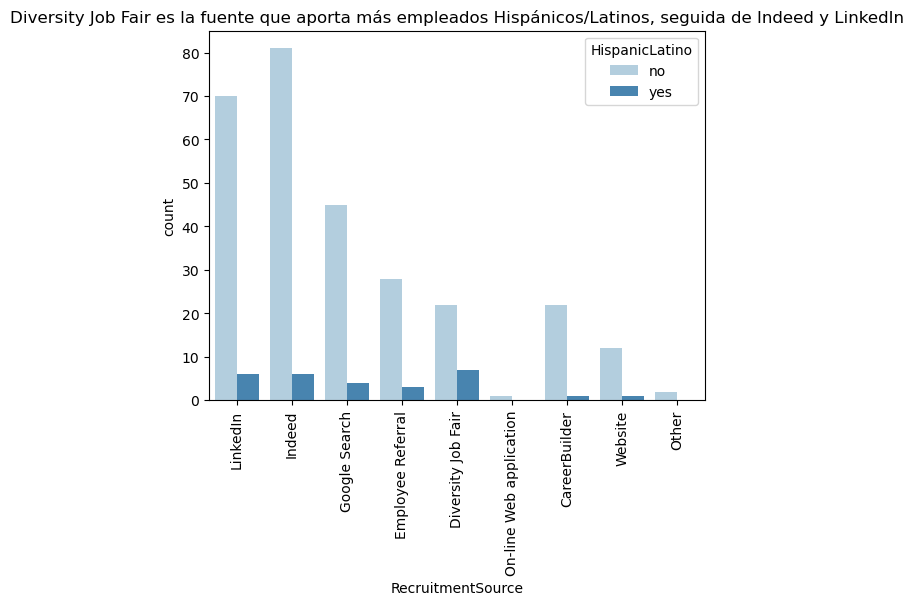

In [13]:
# primeras pruebas con plots y variables

sns.countplot(x='RecruitmentSource', data=df, hue = 'HispanicLatino',palette='Blues')
plt.xticks(rotation=90)
plt.title('Diversity Job Fair es la fuente que aporta más empleados Hispánicos/Latinos, seguida de Indeed y LinkedIn')

Text(0.5, 1.0, 'Diversity Job Fair es la principal fuente de contratación de Black or African American')

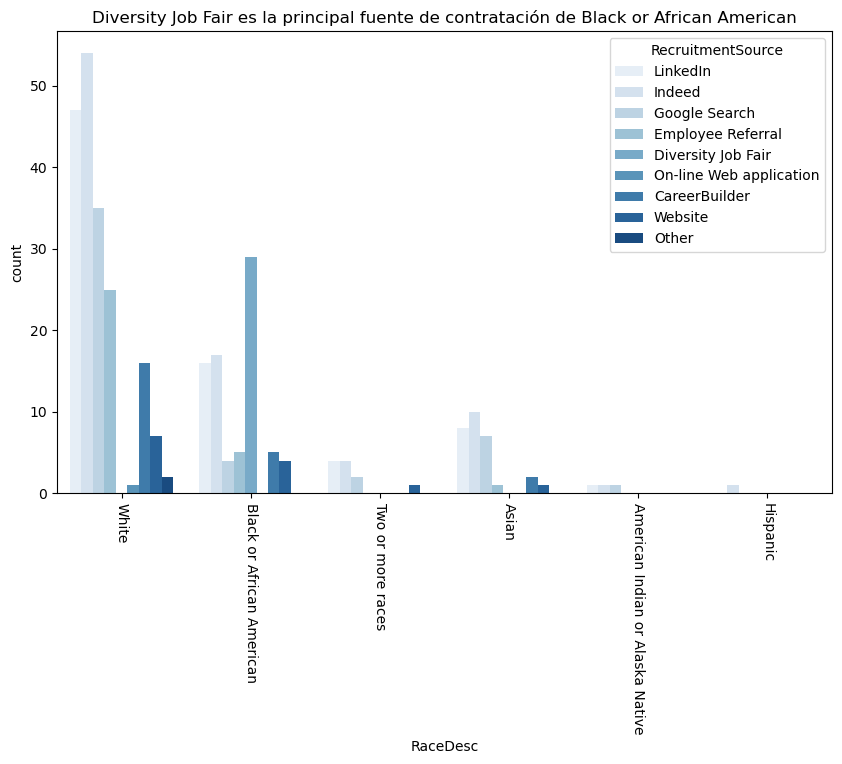

In [14]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(x='RaceDesc', data=df, hue = 'RecruitmentSource',palette='Blues')
plt.xticks(rotation=-90)
plt.title('Diversity Job Fair es la principal fuente de contratación de Black or African American')



Text(0.5, 1.0, 'Indeed es la fuente que aporta mas empleados Female')

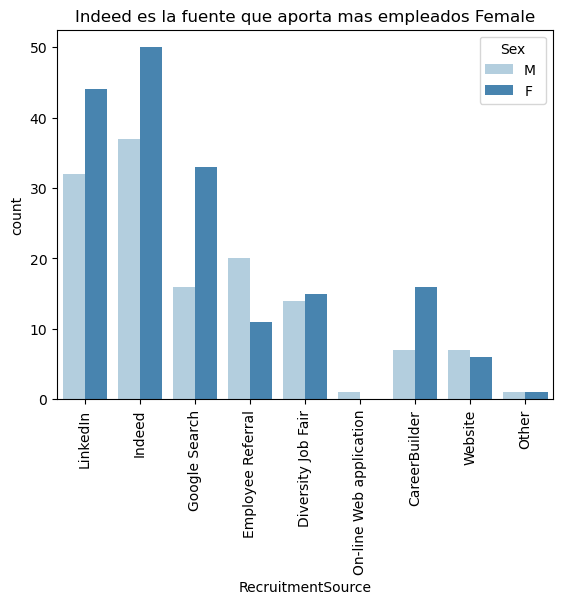

In [15]:
sns.countplot(x='RecruitmentSource', data=df, hue = 'Sex',palette='Blues')
plt.xticks(rotation=90)
plt.title('Indeed es la fuente que aporta mas empleados Female')


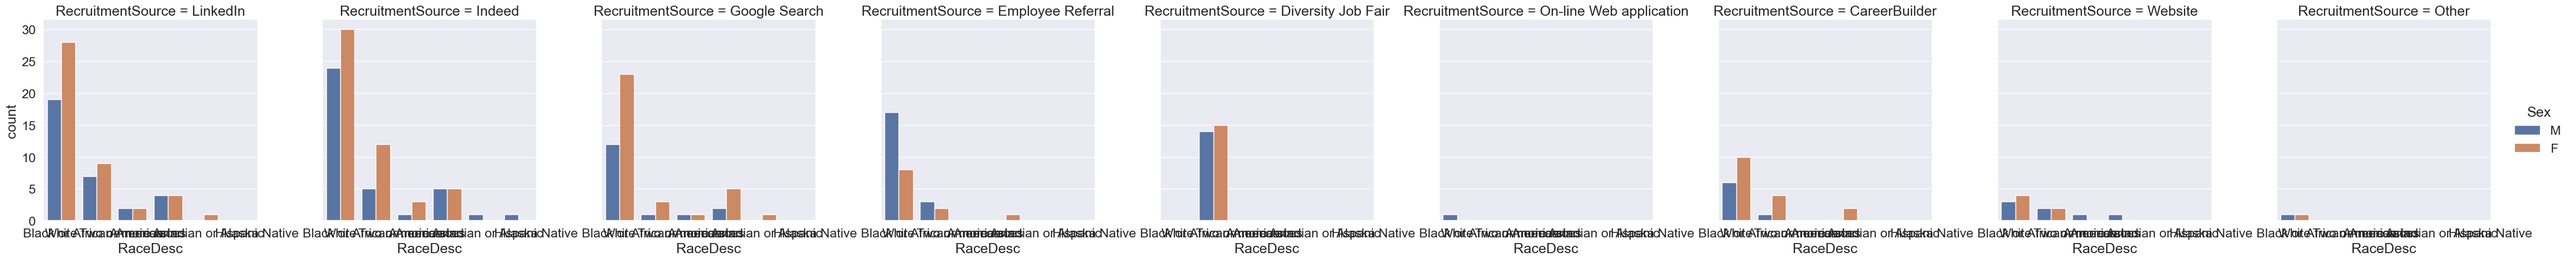

In [16]:
# Return font size to its original scale
sns.set(font_scale=1.5)
# Categorical Plot
g = sns.catplot(x='RaceDesc', 
                   data=df, 
                   hue='Sex',  # Color by Sex
                   col='RecruitmentSource',  # Separate by passenger class
                   kind='count') # Countplot


In [17]:
# personas contratadas por cada fuente de recruiting

for group, df_group in df.groupby(['RecruitmentSource']):
    print(group, df_group.shape[0])

CareerBuilder 23
Diversity Job Fair 29
Employee Referral 31
Google Search 49
Indeed 87
LinkedIn 76
On-line Web application 1
Other 2
Website 13


C:\Users\SOLERJO\AppData\Local\Temp\ipykernel_23856\935376511.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, df_group in df.groupby(['RecruitmentSource']):


In [18]:
# volumen de personas por RaceDesc

for group, df_group in df.groupby(['RaceDesc']):
    print(group, df_group.shape[0])

American Indian or Alaska Native 3
Asian 29
Black or African American 80
Hispanic 1
Two or more races 11
White 187


C:\Users\SOLERJO\AppData\Local\Temp\ipykernel_23856\49880700.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, df_group in df.groupby(['RaceDesc']):


In [19]:
# volumen de personas que tenemos, agrupadas por Recruitment source y RaceDesc

df.groupby(['RecruitmentSource']).apply(lambda x: x['RaceDesc'].value_counts())

RecruitmentSource                                        
CareerBuilder            White                               16
                         Black or African American            5
                         Asian                                2
Diversity Job Fair       Black or African American           29
Employee Referral        White                               25
                         Black or African American            5
                         Asian                                1
Google Search            White                               35
                         Asian                                7
                         Black or African American            4
                         Two or more races                    2
                         American Indian or Alaska Native     1
Indeed                   White                               54
                         Black or African American           17
                         Asian                

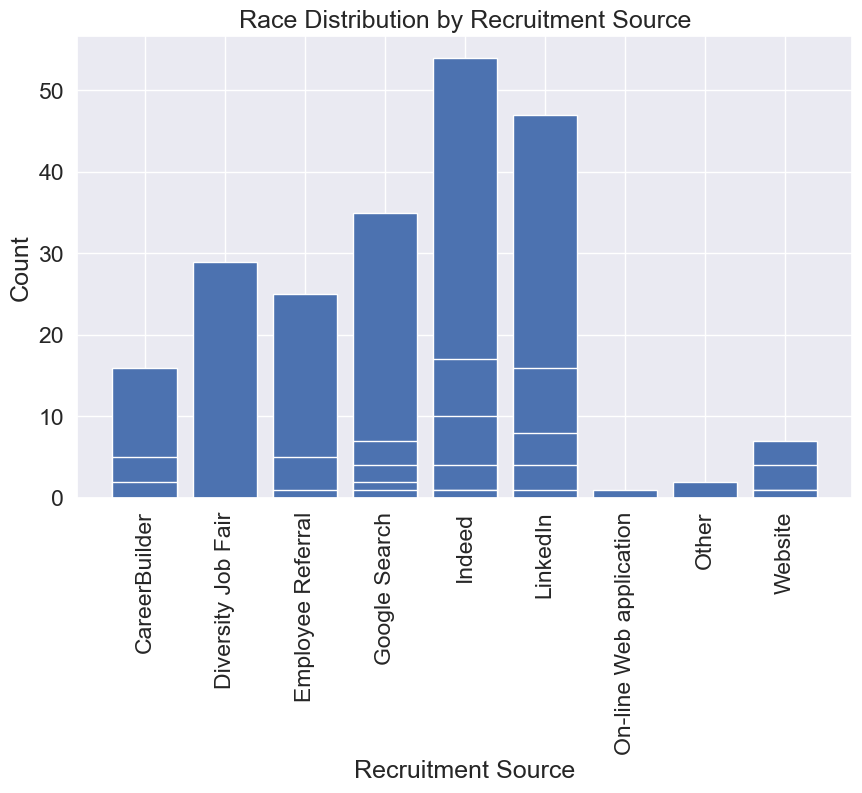

In [20]:
# gráfico para representar la agrupación:

grouped_data = df.groupby(['RecruitmentSource']).apply(lambda x: x['RaceDesc'].value_counts())
df_plot = pd.DataFrame(grouped_data).reset_index()
df_plot.columns = ['RecruitmentSource', 'RaceDesc', 'Count']

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_plot['RecruitmentSource'], df_plot['Count'])
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.title('Race Distribution by Recruitment Source')
plt.xticks(rotation=90)
plt.show()

In [21]:
# creo una nova columna "Employe_Diverse" a partir de la columna "RaceDesc" indicant 0 o 1 segons si els empleats són "White" (0) o no (1).

new_list = []
for el in df['RaceDesc'].tolist():
    if el == 'White':
        new_list.append(0)
    else:
        new_list.append(1)
df['Employee_Diverse'] = new_list

df[['RaceDesc', 'Employee_Diverse']]

,RaceDesc,Employee_Diverse
0,White,0
1,White,0
2,White,0
3,White,0
4,White,0
...,...,...
306,White,0
307,Asian,1
308,White,0
309,White,0


In [22]:
# creo un nou dataframe "df_Diverse" amb la columna "Employee_Diverse" filtrat per "1", assumint que són els empleats amb diversitat

df_Diverse = df[df['Employee_Diverse'] == 1]
df_Diverse

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Employee_Diverse
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4,1
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12,1
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15,1
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9,1
13,"Barone, Francesco A",10265,0,0,1,1,5,3,0,58709,...,18.0,Google Search,Fully Meets,4.60,4,0,2/14/2019,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Wang, Charlie",10172,0,0,1,1,3,3,0,84903,...,13.0,Indeed,Fully Meets,3.42,4,7,1/4/2019,0,17,1
299,"Warfield, Sarah",10127,0,4,0,1,3,3,0,107226,...,7.0,Employee Referral,Fully Meets,4.20,4,8,2/5/2019,0,7,1
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16,1
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4,1


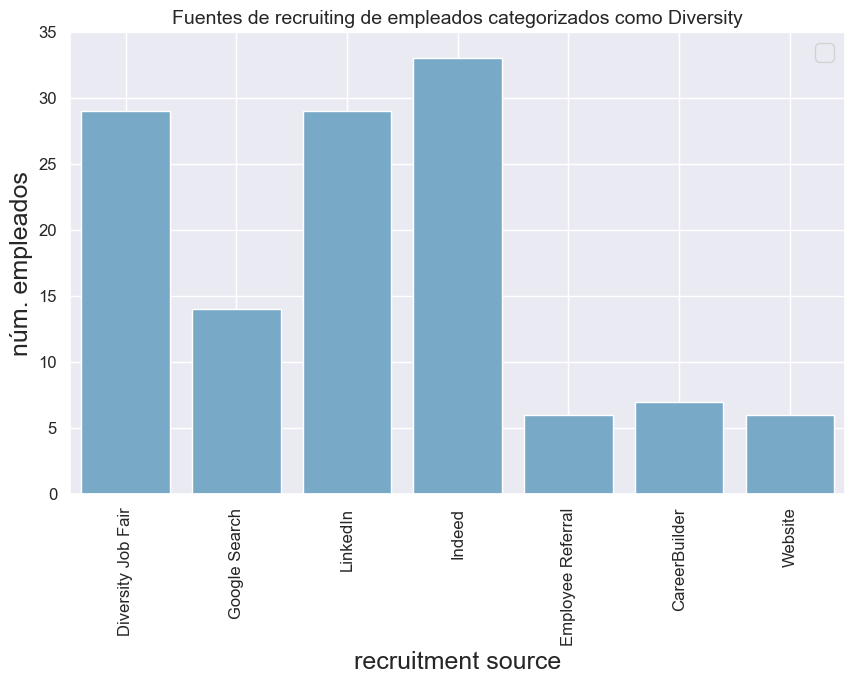

In [23]:
# gràfic de barres per representar, només de la columna amb empleats diversos, les fonts de recultament

plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df_Diverse, hue = 'Employee_Diverse', palette='Blues')
plt.xticks(rotation=90, fontsize=12)
plt.title('Fuentes de recruiting de empleados categorizados como Diversity', fontsize=14)
plt.legend('')
plt.grid(True, linestyle='-', linewidth=1, alpha=1)
plt.ylabel('núm. empleados')
plt.xlabel('recruitment source')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35 ], fontsize=12)
plt.show()


##### Pregunta 2: Is there any relationship between who a person works for and their performance score?
- Revisar las puntuaciones de los empleados y sus superiores
- Columnas clave: PerfScoreID, ManagerName

In [24]:
df['PerfScoreID'].describe()

count    311.000000
mean       2.977492
std        0.587072
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: PerfScoreID, dtype: float64

In [25]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'Employee_Diverse'],
      dtype='object')

In [26]:
dfNew = df[['PerfScoreID', 'Department', 'ManagerName', 'ManagerID',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'Sex']]
dfNew.head()

,PerfScoreID,Department,ManagerName,ManagerID,PerformanceScore,EngagementSurvey,EmpSatisfaction,Sex
0,4,Production,Michael Albert,22.0,Exceeds,4.60,5,M
1,3,IT/IS,Simon Roup,4.0,Fully Meets,4.96,3,M
2,3,Production,Kissy Sullivan,20.0,Fully Meets,3.02,3,F
3,3,Production,Elijiah Gray,16.0,Fully Meets,4.84,5,F
4,3,Production,Webster Butler,39.0,Fully Meets,5.00,4,F


In [27]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PerfScoreID       311 non-null    int64  
 1   Department        311 non-null    object 
 2   ManagerName       311 non-null    object 
 3   ManagerID         311 non-null    float64
 4   PerformanceScore  311 non-null    object 
 5   EngagementSurvey  311 non-null    float64
 6   EmpSatisfaction   311 non-null    int64  
 7   Sex               311 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 19.6+ KB


In [28]:
dfNew['ManagerName'].value_counts().loc[lambda x : x>=10]

Michael Albert    22
Kissy Sullivan    22
Elijiah Gray      22
Kelley Spirea     22
Brannon Miller    22
Ketsia Liebig     21
David Stanley     21
Amy Dunn          21
Webster Butler    21
Janet King        19
Simon Roup        17
Peter Monroe      14
John Smith        14
Lynn Daneault     13
Name: ManagerName, dtype: int64

In [29]:
dfNew


,PerfScoreID,Department,ManagerName,ManagerID,PerformanceScore,EngagementSurvey,EmpSatisfaction,Sex
0,4,Production,Michael Albert,22.0,Exceeds,4.60,5,M
1,3,IT/IS,Simon Roup,4.0,Fully Meets,4.96,3,M
2,3,Production,Kissy Sullivan,20.0,Fully Meets,3.02,3,F
3,3,Production,Elijiah Gray,16.0,Fully Meets,4.84,5,F
4,3,Production,Webster Butler,39.0,Fully Meets,5.00,4,F
...,...,...,...,...,...,...,...,...
306,3,Production,Kissy Sullivan,20.0,Fully Meets,4.07,4,M
307,1,Production,Brannon Miller,12.0,PIP,3.20,2,F
308,4,IT/IS,Janet King,2.0,Exceeds,4.60,5,F
309,3,IT/IS,Simon Roup,4.0,Fully Meets,5.00,3,F


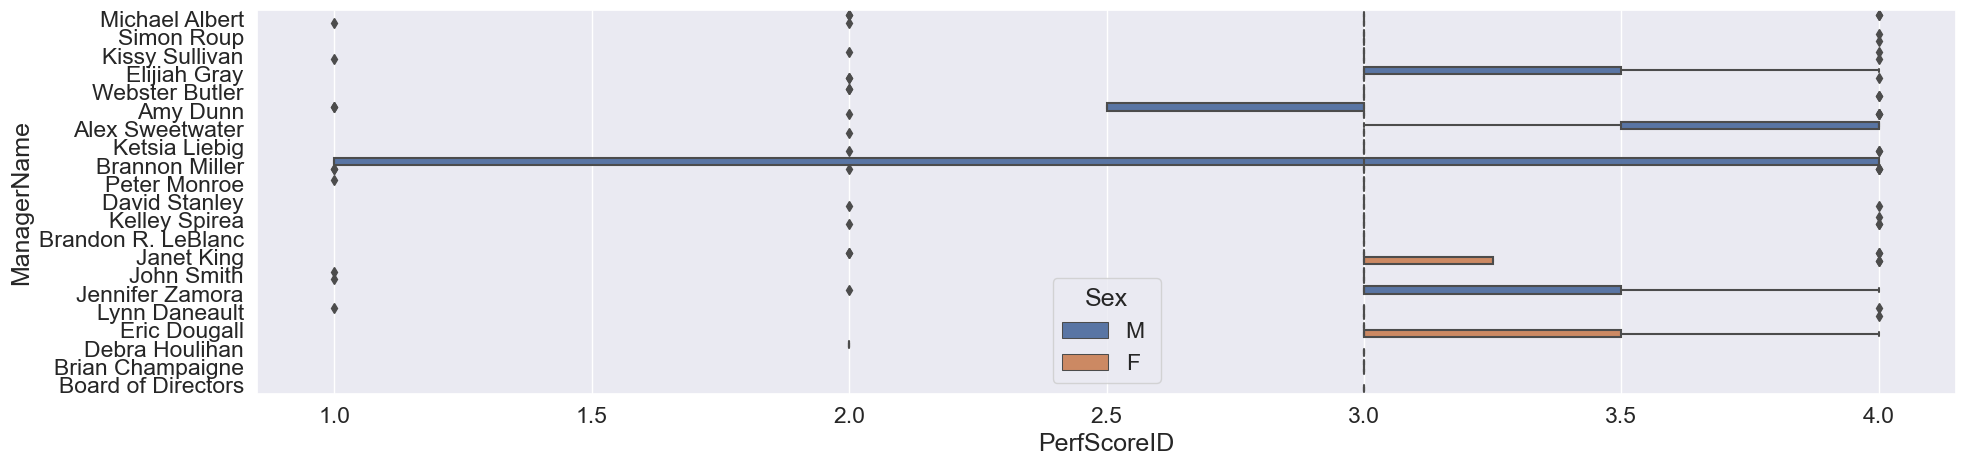

In [36]:
# llegir i entendre bé el resultat: vol dir que hi ha 3-4 managers amb empleats amb  
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 5)) 

sns.boxplot(x=dfNew['PerfScoreID'], y=dfNew['ManagerName'], hue=dfNew['Sex'])
plt.tight_layout()

#Save or show
plt.show()

Department


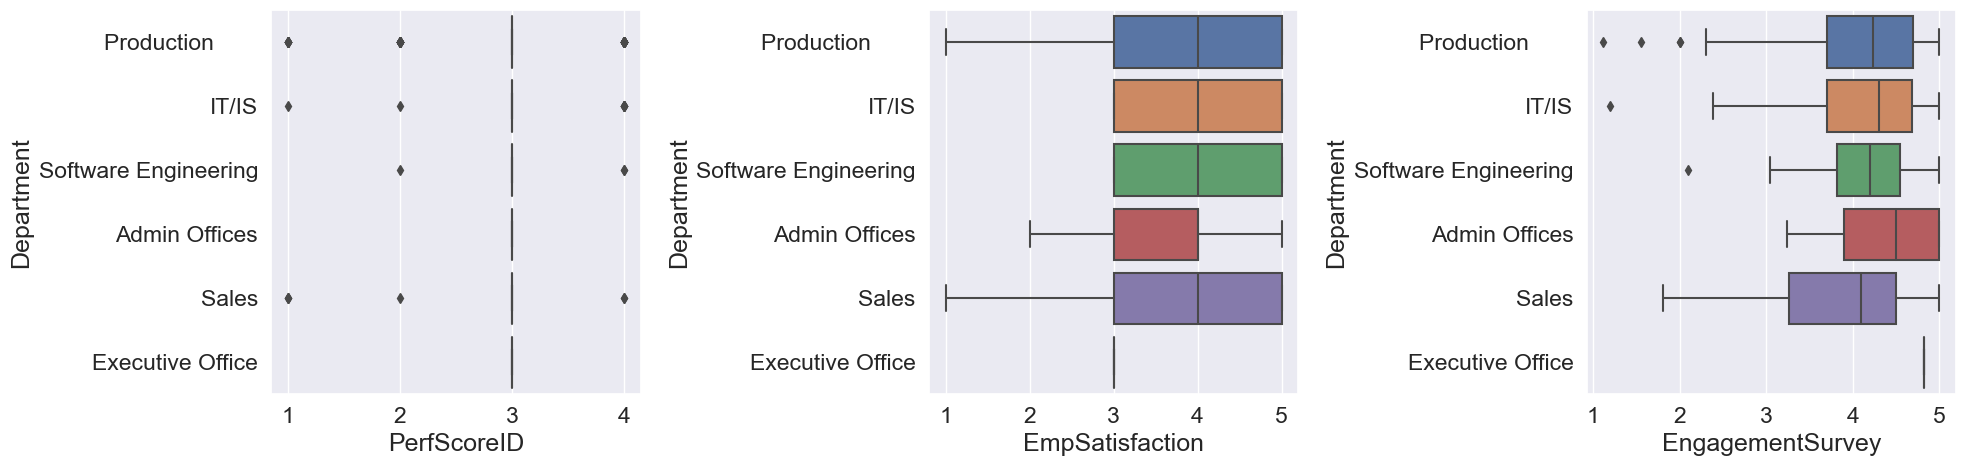

ManagerName


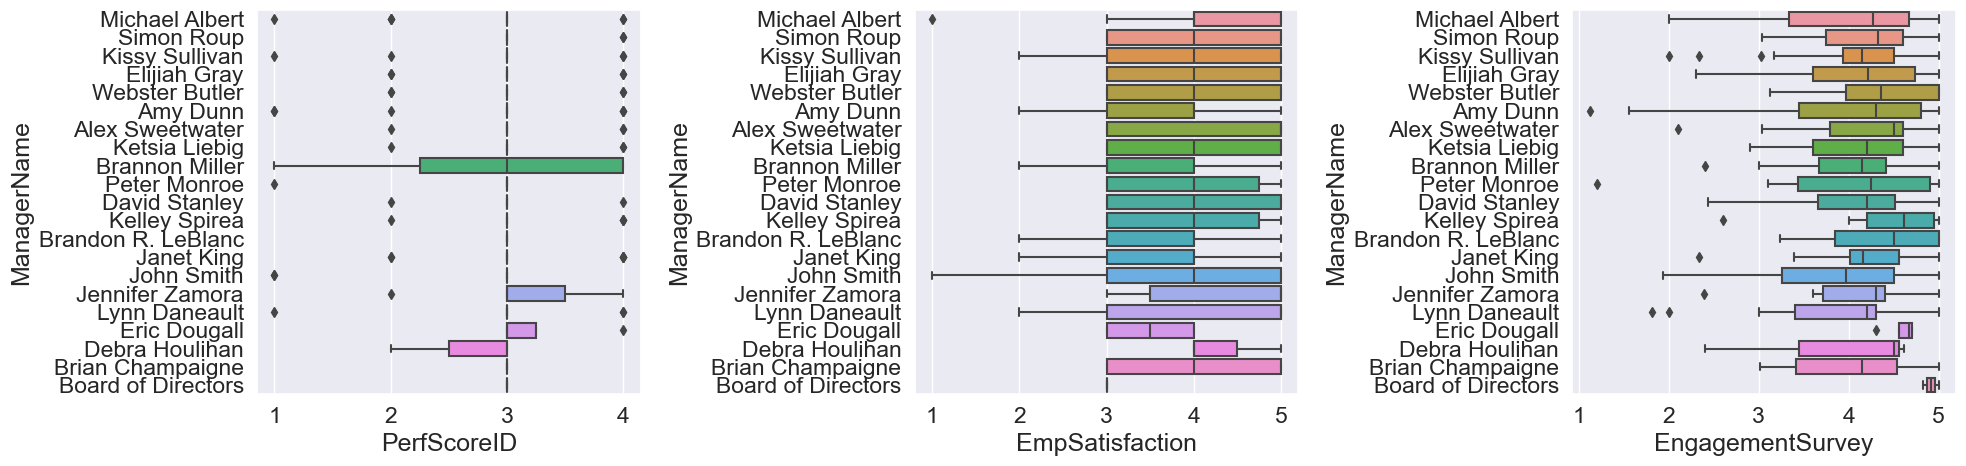

PerformanceScore


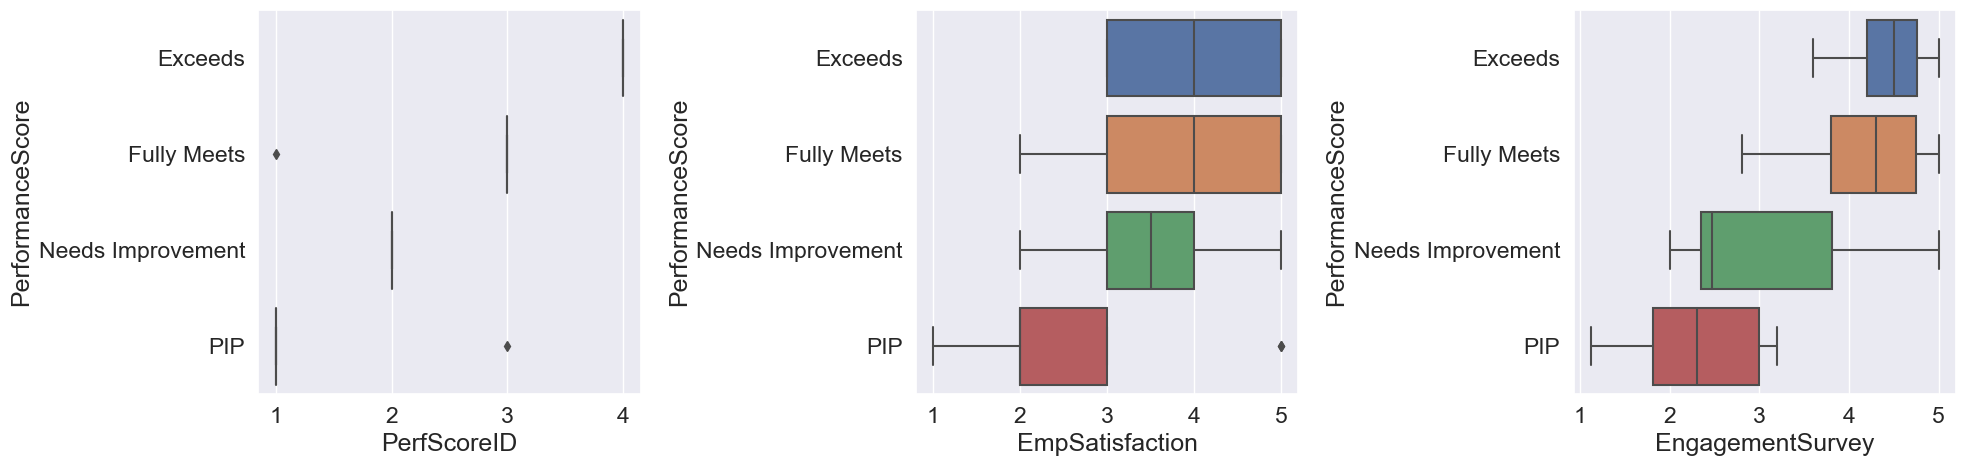

Sex


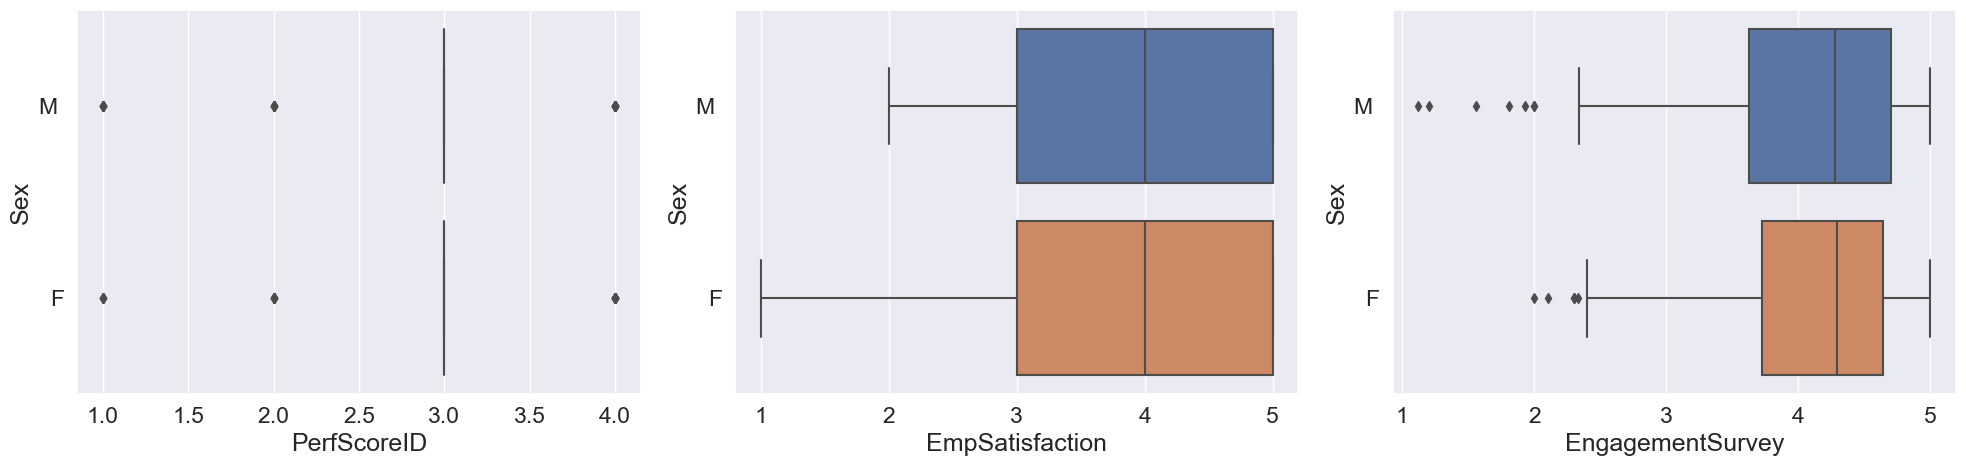

In [ ]:
for col in dfNew.columns: 
    if dfNew[col].dtype == 'O':
        print(col)
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 
        sns.boxplot(x="PerfScoreID", y=col, data=dfNew, ax=ax1)
        sns.boxplot(x="EmpSatisfaction", y=col, data=dfNew, ax=ax2)
        sns.boxplot(x="EngagementSurvey", y=col, data=dfNew, ax=ax3)   
        plt.tight_layout()  
        plt.show()   

Department


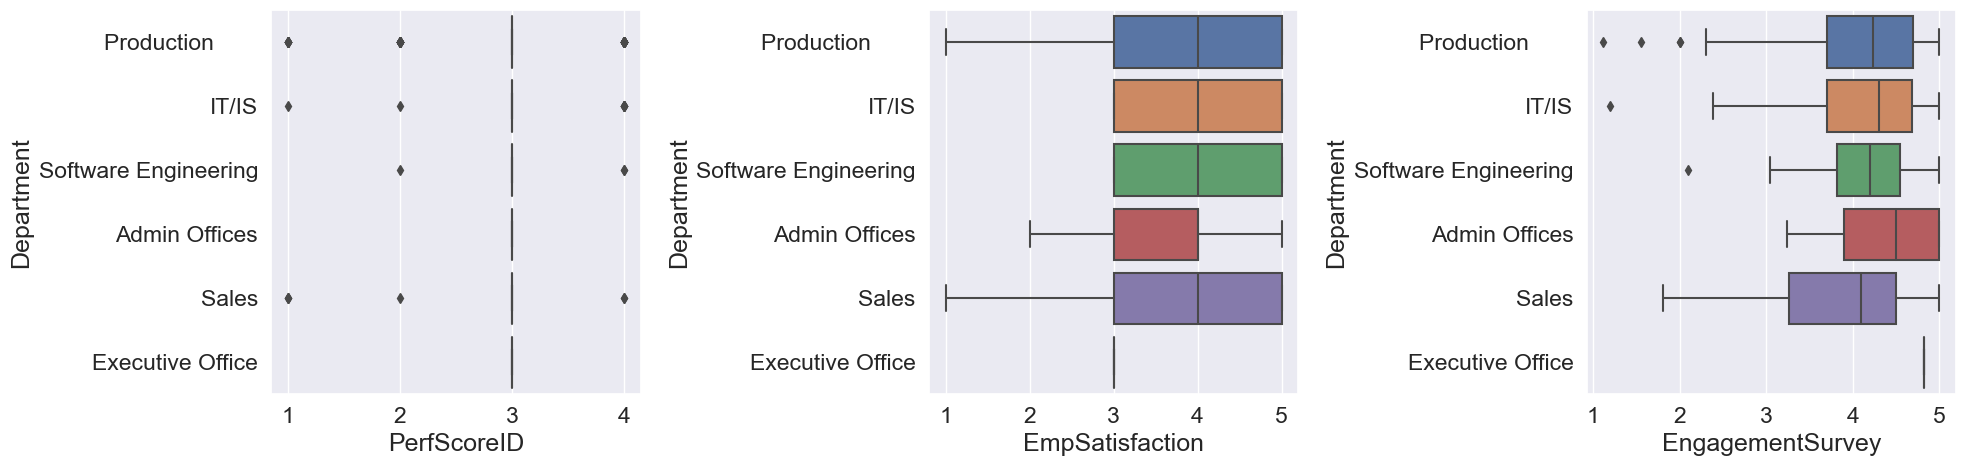

ManagerName


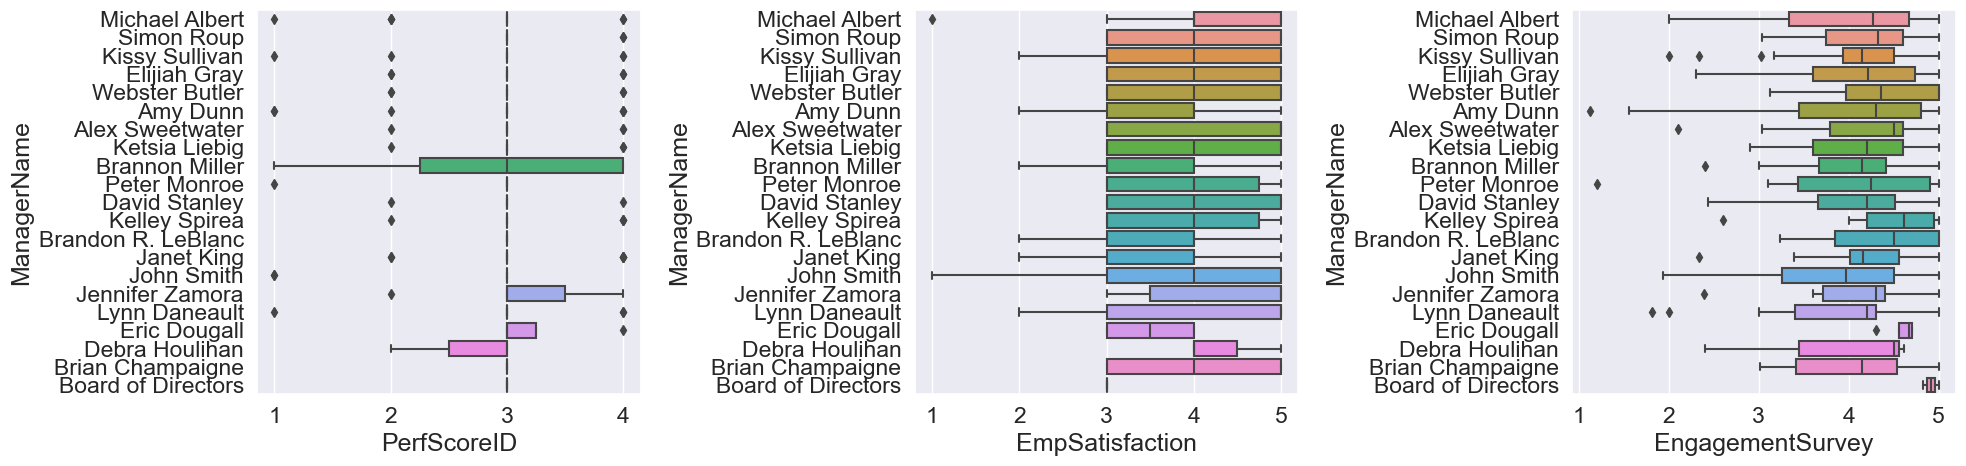

PerformanceScore


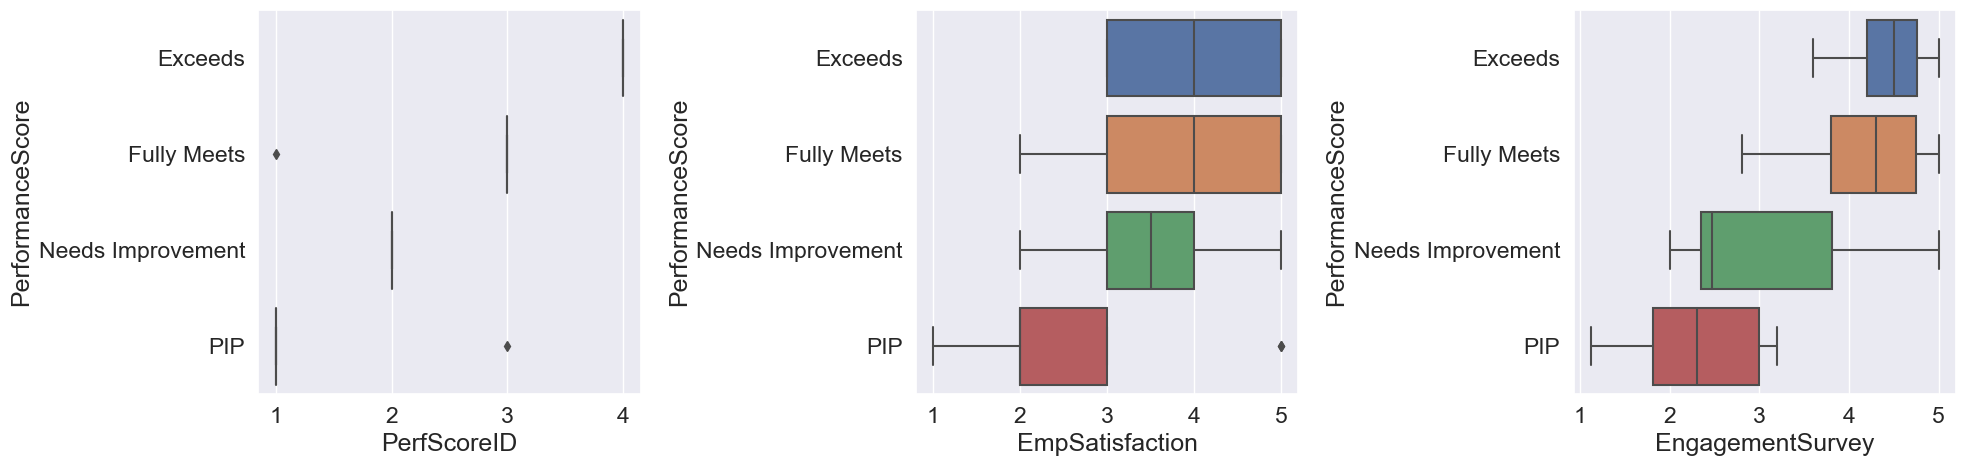

Sex


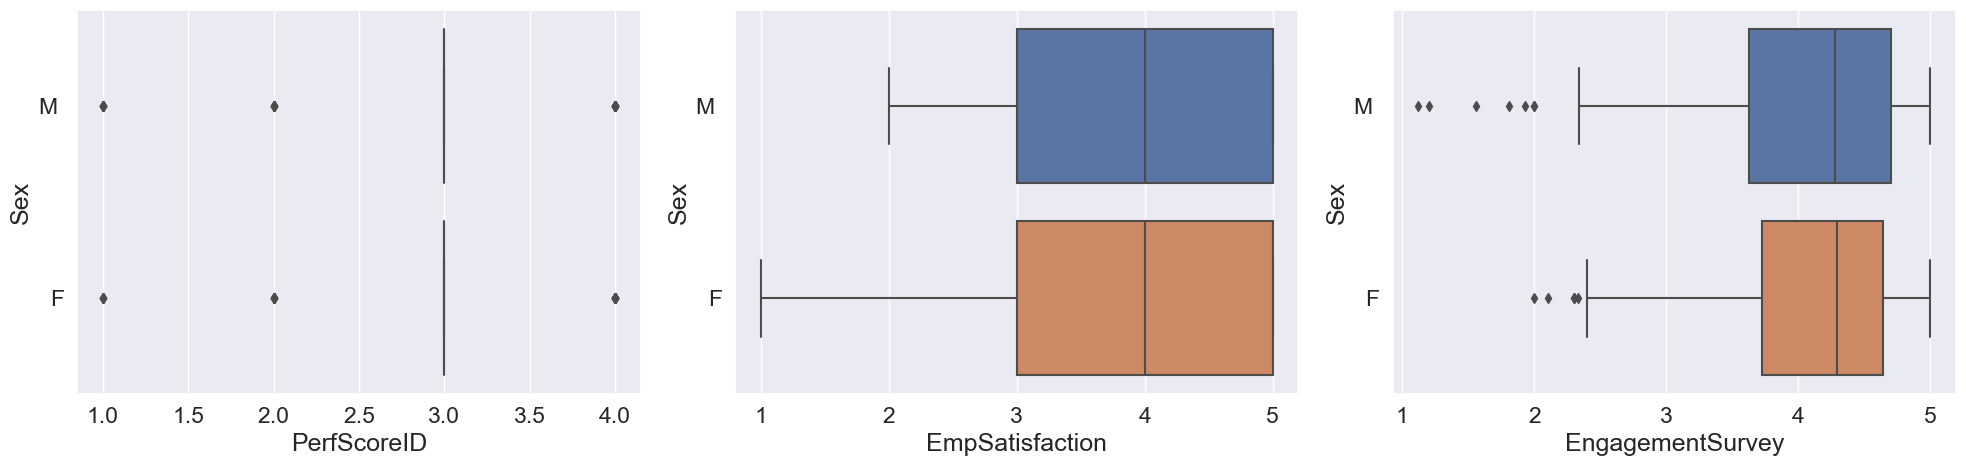

In [ ]:
for col in dfNew.columns: 
    if dfNew[col].dtype == 'O':
        print(col)
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) 
        sns.boxplot(x="PerfScoreID", y=col, data=dfNew, ax=ax1)
        sns.boxplot(x="EmpSatisfaction", y=col, data=dfNew, ax=ax2)
        sns.boxplot(x="EngagementSurvey", y=col, data=dfNew, ax=ax3)   
        plt.tight_layout()  
        plt.show()  